In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
import tensorflow as tf
import tensorflow_datasets.public_api as tfds

In [2]:
src_dir = "flickr_logos_27_dataset_images"
dest = "LOGOS"

if not os.path.exists(dest):
    os.makedirs(dest)
import pandas as pd
import cv2
df = pd.read_csv("flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)
df

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [3]:
dtdir = 'flickr_logos_27_dataset_images/'

In [4]:
im = df[0][0]
size = df.iloc[:,3:]
img = os.path.join(dtdir,im)
size = size.values.tolist()
size[0][0],size[0][1],size[0][2],size[0][3]

(38, 12, 234, 142)

In [5]:
X = df.iloc[:,0]
Y = df.iloc[:,1]
dtdir = 'flickr_logos_27_dataset_images/'
im = df[0][0]
size = df.iloc[:,3:]
size

,3,4,5,6
0,38,12,234,142
1,242,208,413,331
2,13,5,89,60
3,43,122,358,354
4,83,63,130,93
...,...,...,...,...
4531,15,6,253,54
4532,136,161,304,222
4533,2,4,499,106
4534,1,69,342,157


(210, 280, 3)

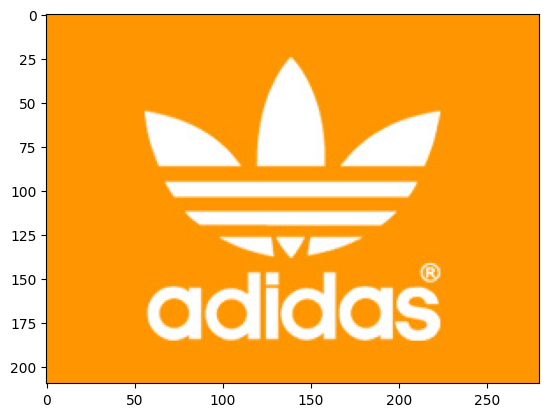

In [6]:
img = os.path.join(dtdir,im)
size = size.values.tolist()
size[0][0],size[0][1],size[0][2],size[0][3]
(38, 12, 234, 142)
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [7]:
print(img)

flickr_logos_27_dataset_images/144503924.jpg


(130, 196, 3)

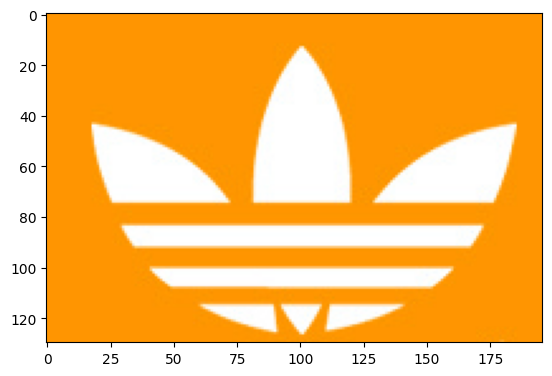

In [8]:
image = cv2.imread(img)
image = image[size[0][1]:size[0][3],size[0][0]:size[0][2]]
plt.imshow(image)
image.shape

In [9]:
testdist = 'TEST'
if not os.path.exists(testdist):
    os.makedirs(testdist)
y = list(set(list(Y)))
y.sort()

distractor = pd.read_csv("flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)
distractor

,0
0,http://farm2.static.flickr.com/1184/1013364004...
1,http://farm2.static.flickr.com/1108/1047095104...
2,http://farm2.static.flickr.com/1359/1076885577...
3,http://farm1.static.flickr.com/53/110432189_6d...
4,http://farm2.static.flickr.com/1144/1153048029...
...,...
4202,http://farm2.static.flickr.com/1254/889763557_...
4203,http://farm2.static.flickr.com/1308/901063602_...
4204,http://farm1.static.flickr.com/18/93551127_fed...
4205,http://farm2.static.flickr.com/1033/978252884_...


In [10]:
query = pd.read_csv("flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)
query

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas
...,...,...
265,3480640208.jpg,none
266,3486224308.jpg,none
267,3486430785.jpg,none
268,3490185235.jpg,none


(449, 500, 3)

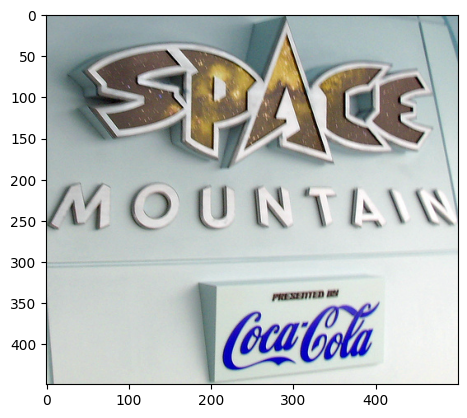

In [11]:
img = os.path.join(dtdir,query[0][23])
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [12]:
testdist = 'TEST'
if not os.path.exists(testdist):
    os.makedirs(testdist)
y = list(set(list(Y)))
y.sort()
distractor = pd.read_csv("flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)
distractor

,0
0,http://farm2.static.flickr.com/1184/1013364004...
1,http://farm2.static.flickr.com/1108/1047095104...
2,http://farm2.static.flickr.com/1359/1076885577...
3,http://farm1.static.flickr.com/53/110432189_6d...
4,http://farm2.static.flickr.com/1144/1153048029...
...,...
4202,http://farm2.static.flickr.com/1254/889763557_...
4203,http://farm2.static.flickr.com/1308/901063602_...
4204,http://farm1.static.flickr.com/18/93551127_fed...
4205,http://farm2.static.flickr.com/1033/978252884_...


In [13]:
for i in range(len(X)):
    try:
        destrain = os.path.join(dest,Y[i])
        savepath = os.path.join(destrain,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(128,128))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

error
error
error
error
error


In [14]:
A = query.iloc[:,0]
B = query.iloc[:,1]
A

0      2403695909.jpg
1      2912587920.jpg
2      3441398196.jpg
3      4605630935.jpg
4      4606245138.jpg
            ...      
265    3480640208.jpg
266    3486224308.jpg
267    3486430785.jpg
268    3490185235.jpg
269    3490913574.jpg
Name: 0, Length: 270, dtype: object

TEST\Ford\106523337.jpg


(224, 224, 3)

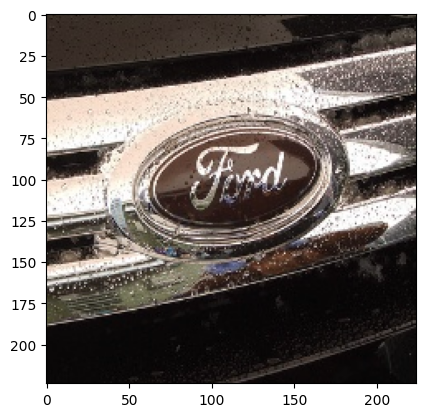

In [15]:
HEIGHT = 224
WIDTH = 224
for i in range(len(A)):
    try:
        destrain = os.path.join(testdist,B[i])
        savepath = os.path.join(destrain,A[i])
        img  = os.path.join(dtdir,A[i])
        image = cv2.imread(img)
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass
imagePaths = list(paths.list_images(testdist))
img = imagePaths[40]
print(img)
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [16]:
train = ImageDataGenerator(
rescale = 1/255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
featurewise_center=True, # Set input mean to 0 over the dataset, feature-wise
featurewise_std_normalization=True, # Divide inputs by std of the dataset, feature-wise
rotation_range=40, # Degree range for random rotations
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split = 0.2)
imagePaths = list(paths.list_images(dest))


In [17]:
imagePaths = list(paths.list_images(dest))
#os.makedirs('preview')
img = load_img(imagePaths[50])  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='yh', save_format='jpeg'):
    i += 1
    if i > 10:
        break 

C:\Users\DharaniRaja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\DharaniRaja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


(128, 128, 3)

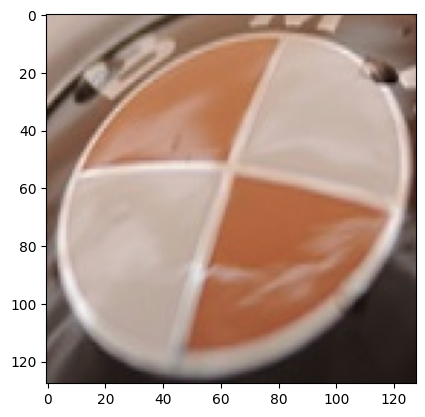

In [18]:
image = cv2.imread(imagePaths[90])

plt.imshow(image)
image.shape

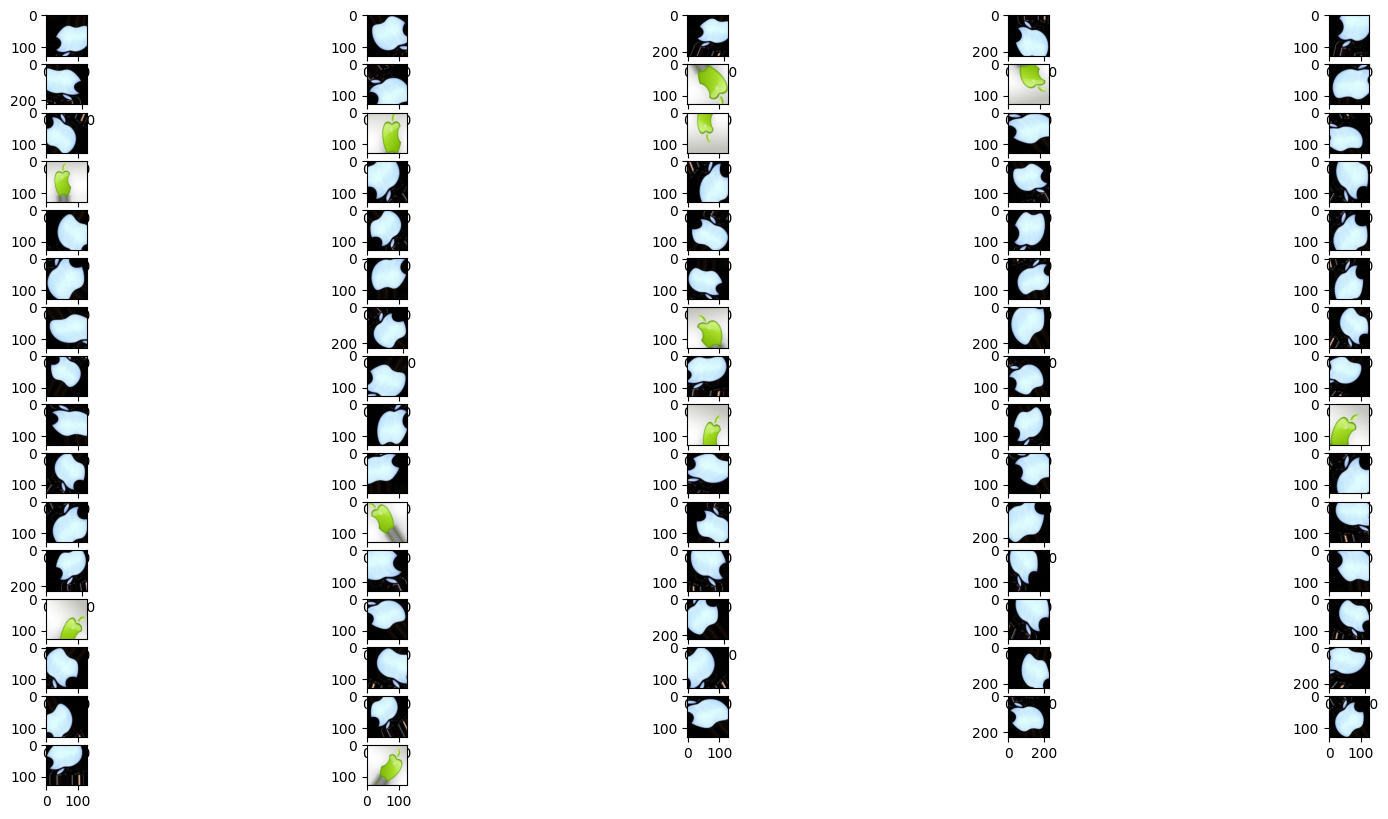

In [19]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('preview/*.jpeg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [20]:
HEIGHT = 224
WIDTH = 224
INIT_LR = 1e-5
EPOCHS =  200
BS = 8
trainset = train.flow_from_directory(dest,
target_size = (WIDTH,HEIGHT),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = 'training',
class_mode='categorical')

Found 756 images belonging to 27 classes.


In [21]:
validset = train.flow_from_directory(dest,
target_size = (WIDTH,HEIGHT),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = 'validation',
class_mode='categorical')

Found 188 images belonging to 27 classes.


In [22]:
imagePaths = list(paths.list_images(dest))
trainset.filenames

['Adidas\\2534155497.jpg',
 'Adidas\\2550056374.jpg',
 'Adidas\\2553832700.jpg',
 'Adidas\\2912587920.jpg',
 'Adidas\\3005794070.jpg',
 'Adidas\\3007885565.jpg',
 'Adidas\\3294282629.jpg',
 'Adidas\\3308750600.jpg',
 'Adidas\\3441398196.jpg',
 'Adidas\\3541292073.jpg',
 'Adidas\\3732387125.jpg',
 'Adidas\\390321909.jpg',
 'Adidas\\4061203190.jpg',
 'Adidas\\4061203382.jpg',
 'Adidas\\4061675184.jpg',
 'Adidas\\4336482746.jpg',
 'Adidas\\4499338915.jpg',
 'Adidas\\451265524.jpg',
 'Adidas\\4605630935.jpg',
 'Adidas\\4605631045.jpg',
 'Adidas\\4606245138.jpg',
 'Adidas\\4761260517.jpg',
 'Adidas\\4763207899.jpg',
 'Adidas\\4763209871.jpg',
 'Adidas\\4763210295.jpg',
 'Adidas\\4763847308.jpg',
 'Adidas\\7787186.jpg',
 'Adidas\\791925651.jpg',
 'Apple\\2795236586.jpg',
 'Apple\\299768792.jpg',
 'Apple\\3006946827.jpg',
 'Apple\\3023420658.jpg',
 'Apple\\3065654531.jpg',
 'Apple\\3125626922.jpg',
 'Apple\\3187422169.jpg',
 'Apple\\3190306185.jpg',
 'Apple\\3261774945.jpg',
 'Apple\\32763327

In [23]:
trainset.class_indices

{'Adidas': 0,
 'Apple': 1,
 'BMW': 2,
 'Citroen': 3,
 'Cocacola': 4,
 'DHL': 5,
 'Fedex': 6,
 'Ferrari': 7,
 'Ford': 8,
 'Google': 9,
 'HP': 10,
 'Heineken': 11,
 'Intel': 12,
 'McDonalds': 13,
 'Mini': 14,
 'Nbc': 15,
 'Nike': 16,
 'Pepsi': 17,
 'Porsche': 18,
 'Puma': 19,
 'RedBull': 20,
 'Sprite': 21,
 'Starbucks': 22,
 'Texaco': 23,
 'Unicef': 24,
 'Vodafone': 25,
 'Yahoo': 26}

In [24]:
from tensorflow.keras.applications import InceptionV3
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(WIDTH, HEIGHT, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(4096, activation="relu")(headModel)
headModel = Dense(1072, activation='relu')(headModel)
headModel = Dropout(0.2)(headModel)
output_layer = Dense(trainset.num_classes, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model1 = Model(inputs=baseModel.input, outputs=output_layer)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False



In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
baseModel1 = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(WIDTH, HEIGHT, 3)))
for layer in baseModel1.layers[:-2]:
	layer.trainable = False
headModel1 = baseModel1.output
headModel1 = GlobalAveragePooling2D()(headModel1)
headModel1 = Flatten(name="flatten")(headModel1)
headModel1 = Dense(4096, activation="relu")(headModel1)
headModel1 = Dense(1072, activation='relu')(headModel1)
headModel1 = Dropout(0.2)(headModel1)
predictions = Dense(trainset.num_classes, activation="softmax")(headModel1)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model2 = Model(inputs=baseModel1.inputs, outputs=predictions)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process



In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath="model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint=ModelCheckpoint(

filepath=model_filepath, monitor='val_accuracy',mode="max", save_best_only=True, verbose=1)



In [27]:
print("[INFO] compiling model...")
INIT_LR = 1e-4
sgd = SGD(lr=INIT_LR,momentum=0.9,nesterov=False)
model1.compile(loss="categorical_crossentropy", optimizer="sgd",
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\DharaniRaja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
print("[INFO] compiling model...")
model2.compile(loss="categorical_crossentropy", optimizer="sgd",
	metrics=["accuracy"])

[INFO] compiling model...


In [29]:
H = model1.fit_generator(
	trainset,
  validation_data = validset,
	epochs=5,
  callbacks=[checkpoint])

C:\Users\DharaniRaja\AppData\Local\Temp\ipykernel_65088\476674567.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model1.fit_generator(


Epoch 1/5
95/95 [==============================] - ETA: 0s - loss: 3.4934 - accuracy: 0.0569
Epoch 1: val_accuracy improved from -inf to 0.20213, saving model to model-01-0.2021.hdf5
95/95 [==============================] - 42s 385ms/step - loss: 3.4934 - accuracy: 0.0569 - val_loss: 2.9367 - val_accuracy: 0.2021
Epoch 2/5
95/95 [==============================] - ETA: 0s - loss: 2.9083 - accuracy: 0.1931
Epoch 2: val_accuracy improved from 0.20213 to 0.40957, saving model to model-02-0.4096.hdf5
95/95 [==============================] - 30s 318ms/step - loss: 2.9083 - accuracy: 0.1931 - val_loss: 2.3610 - val_accuracy: 0.4096
Epoch 3/5
95/95 [==============================] - ETA: 0s - loss: 2.3121 - accuracy: 0.3466
Epoch 3: val_accuracy improved from 0.40957 to 0.41489, saving model to model-03-0.4149.hdf5
95/95 [==============================] - 29s 308ms/step - loss: 2.3121 - accuracy: 0.3466 - val_loss: 2.0346 - val_accuracy: 0.4149
Epoch 4/5
95/95 [==============================] 

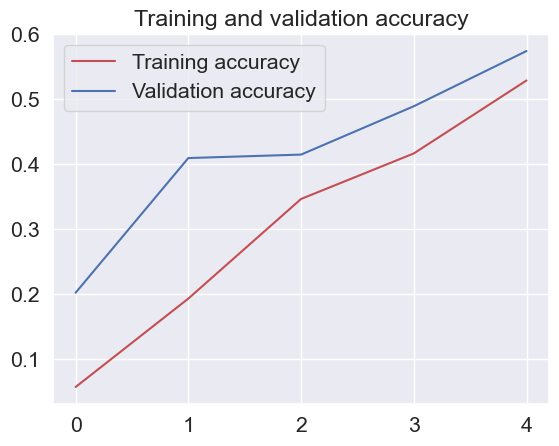

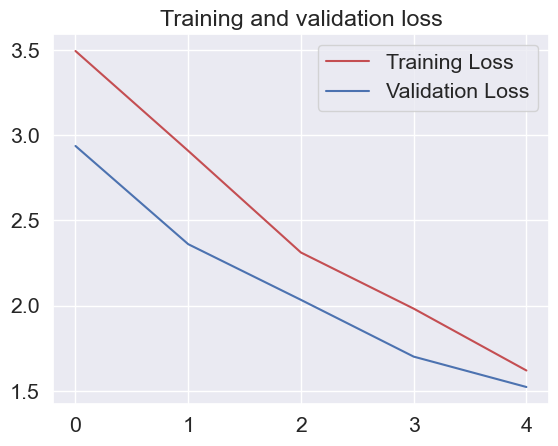

In [67]:
import matplotlib.pyplot as plt
acc=H.history['accuracy'] 
val_acc=H.history['val_accuracy'] 
loss=H.history['loss'] 
val_loss=H.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.savefig('Haccuracy.png')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.savefig('Hloss.png')

plt.show()
# plt.savefig('H.png')
fig = plt.figure()
fig.savefig('model1.png')
plt.close()

In [31]:
H1 = model2.fit_generator(
	trainset,
  validation_data = validset,
	epochs=5,
  callbacks=[checkpoint])

Epoch 1/5


C:\Users\DharaniRaja\AppData\Local\Temp\ipykernel_65088\1187222140.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H1 = model2.fit_generator(


95/95 [==============================] - ETA: 0s - loss: 3.4428 - accuracy: 0.0198
Epoch 1: val_accuracy did not improve from 0.57447
95/95 [==============================] - 92s 952ms/step - loss: 3.4428 - accuracy: 0.0198 - val_loss: 3.2386 - val_accuracy: 0.0851
Epoch 2/5
95/95 [==============================] - ETA: 0s - loss: 3.2550 - accuracy: 0.0754
Epoch 2: val_accuracy did not improve from 0.57447
95/95 [==============================] - 84s 887ms/step - loss: 3.2550 - accuracy: 0.0754 - val_loss: 3.1335 - val_accuracy: 0.2553
Epoch 3/5
95/95 [==============================] - ETA: 0s - loss: 3.1512 - accuracy: 0.1376
Epoch 3: val_accuracy did not improve from 0.57447
95/95 [==============================] - 88s 929ms/step - loss: 3.1512 - accuracy: 0.1376 - val_loss: 2.9487 - val_accuracy: 0.3351
Epoch 4/5
95/95 [==============================] - ETA: 0s - loss: 2.9440 - accuracy: 0.1561
Epoch 4: val_accuracy did not improve from 0.57447
95/95 [==============================]

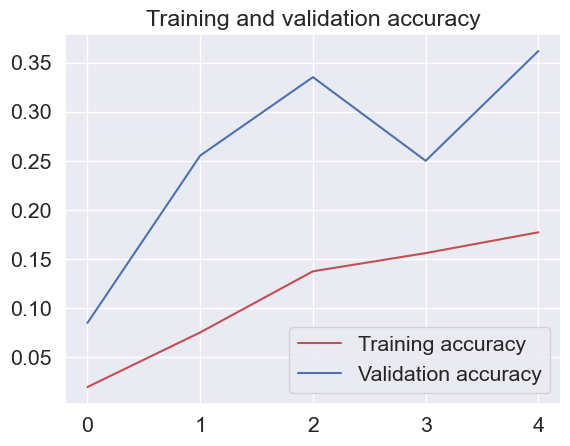

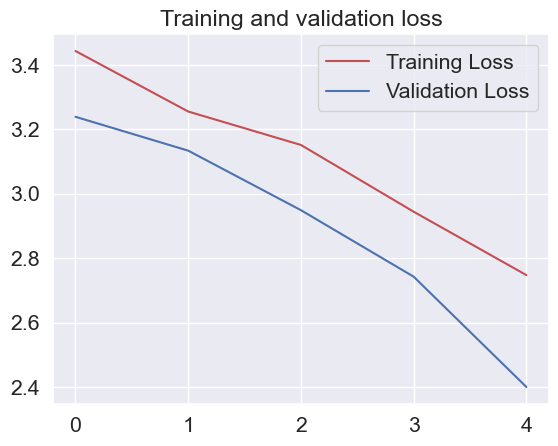

In [68]:
import matplotlib.pyplot as plt
acc=H1.history['accuracy'] 
val_acc=H1.history['val_accuracy'] 
loss=H1.history['loss'] 
val_loss=H1.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.savefig('H1accuracy.png')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.savefig('H1loss.png')

plt.show()

In [33]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('model-126-0.9006.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('model-190-0.9317.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [34]:
ensemble_model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

In [35]:
Final=ensemble_model.fit(
	trainset,
  validation_data = validset,
	epochs=5,
  callbacks=[checkpoint])

Epoch 1/5
95/95 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.9259
Epoch 1: val_accuracy improved from 0.57447 to 0.89362, saving model to model-01-0.8936.hdf5
95/95 [==============================] - 101s 997ms/step - loss: 0.4958 - accuracy: 0.9259 - val_loss: 0.5131 - val_accuracy: 0.8936
Epoch 2/5
95/95 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.9167
Epoch 2: val_accuracy did not improve from 0.89362
95/95 [==============================] - 110s 1s/step - loss: 0.4424 - accuracy: 0.9167 - val_loss: 0.5702 - val_accuracy: 0.8830
Epoch 3/5
95/95 [==============================] - ETA: 0s - loss: 0.3945 - accuracy: 0.9206
Epoch 3: val_accuracy improved from 0.89362 to 0.90426, saving model to model-03-0.9043.hdf5
95/95 [==============================] - 114s 1s/step - loss: 0.3945 - accuracy: 0.9206 - val_loss: 0.4876 - val_accuracy: 0.9043
Epoch 4/5
95/95 [==============================] - ETA: 0s - loss: 0.3854 - accuracy: 0.925

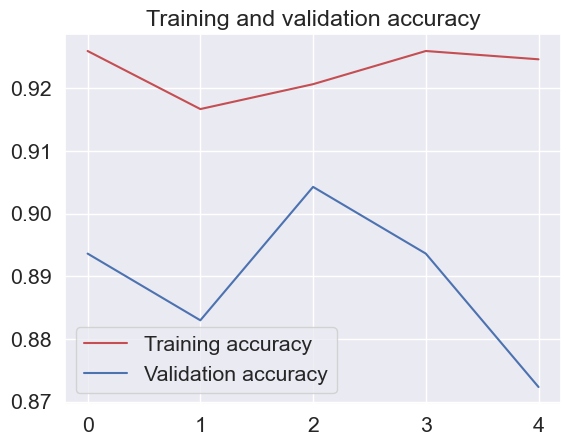

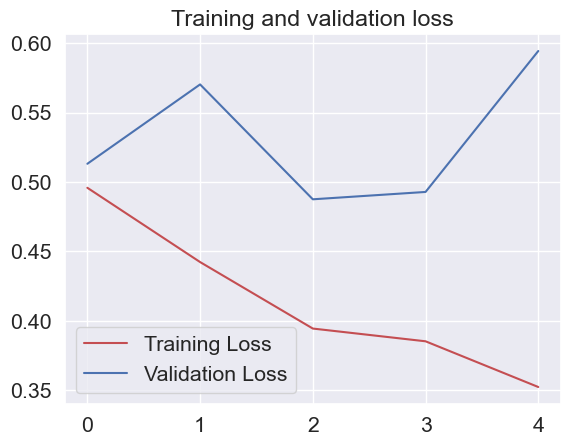

In [72]:
import matplotlib.pyplot as plt
acc=Final.history['accuracy'] 
val_acc=Final.history['val_accuracy'] 
loss=Final.history['loss'] 
val_loss=Final.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.savefig('Finalaccuracy.png')

plt.figure()



plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.savefig('Finalloss.png')
plt.show()

In [47]:
from PIL import Image
def predimg(path):
    image = Image.open(path)
    plt.imshow(image)
    test = load_img(path,target_size=(224,224))
    test = img_to_array(test)
    test = np.expand_dims(test,axis=0)
    test /= 255 
    result = ensemble_model.predict(test,batch_size = BS)
    y_class = result.argmax(axis=-1)
    result = (result*100)
    result = list(np.around(np.array(result),1))
    print(result)
    print(y[y_class[0]])

1/1 [==============================] - 3s 3s/step
[array([ 0. ,  0. ,  0. ,  0. , 10.7,  0. ,  0. ,  0. ,  1.9,  0. ,  0. ,
        2. ,  0. ,  0. ,  0.6,  0. ,  0. ,  1.2, 37.9,  0. ,  0. ,  0. ,
       45.5,  0.1,  0. ,  0. ,  0. ], dtype=float32)]
Starbucks


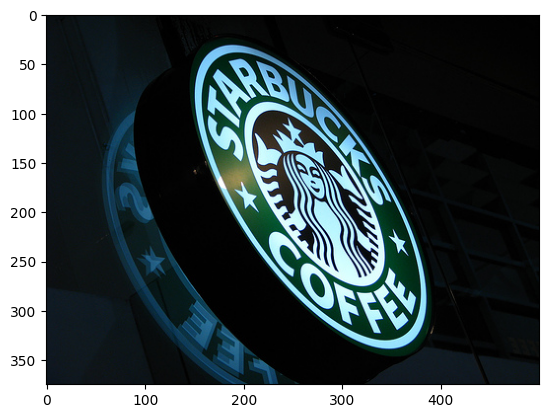

In [48]:
predimg(testimage[28])

1/1 [==============================] - 0s 203ms/step
[array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.], dtype=float32)]
Ferrari


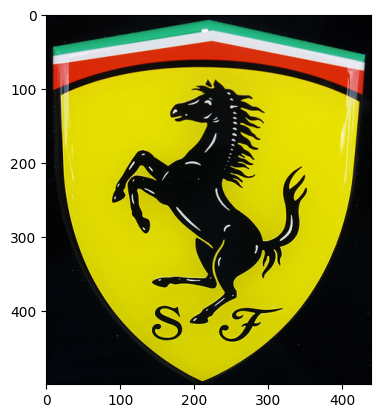

In [49]:
predimg(testimage[48])

1/1 [==============================] - 0s 266ms/step
[array([ 0. ,  0. ,  0. , 99.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ], dtype=float32)]
Citroen


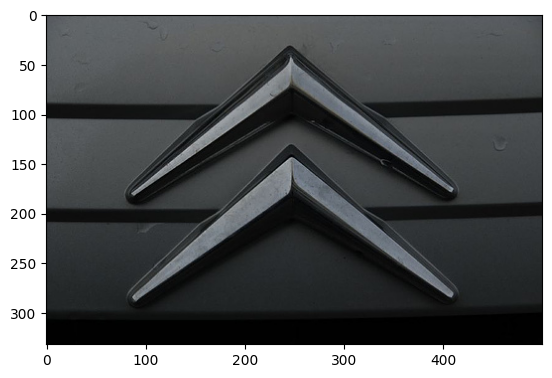

In [50]:
predimg(testimage[2])

1/1 [==============================] - 0s 313ms/step
[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.], dtype=float32)]
Heineken


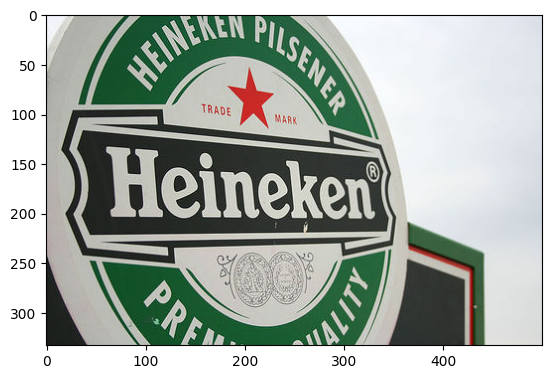

In [51]:
predimg(testimage[56])

In [54]:
print("[INFO] evaluating after fine-tuning network...")
validset.reset()
predIdxs = ensemble_model.predict(x=validset)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(validset.classes, predIdxs,
	target_names=validset.class_indices.keys()))
# serialize the model to disk
print("[INFO] serializing network...")
ensemble_model.save('Logo_Ensembled_SGD.model', save_format="h5")

[INFO] evaluating after fine-tuning network...
24/24 [==============================] - 22s 892ms/step
              precision    recall  f1-score   support

      Adidas       0.75      0.86      0.80         7
       Apple       1.00      1.00      1.00         7
         BMW       0.88      1.00      0.93         7
     Citroen       1.00      0.71      0.83         7
    Cocacola       0.67      0.86      0.75         7
         DHL       0.86      0.86      0.86         7
       Fedex       1.00      0.86      0.92         7
     Ferrari       1.00      0.71      0.83         7
        Ford       1.00      0.71      0.83         7
      Google       1.00      1.00      1.00         7
          HP       1.00      1.00      1.00         7
    Heineken       0.75      0.43      0.55         7
       Intel       1.00      1.00      1.00         7
   McDonalds       0.86      0.86      0.86         7
        Mini       0.78      1.00      0.88         7
         Nbc       1.00      1.0

Confusion Matrix on Valid Set



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


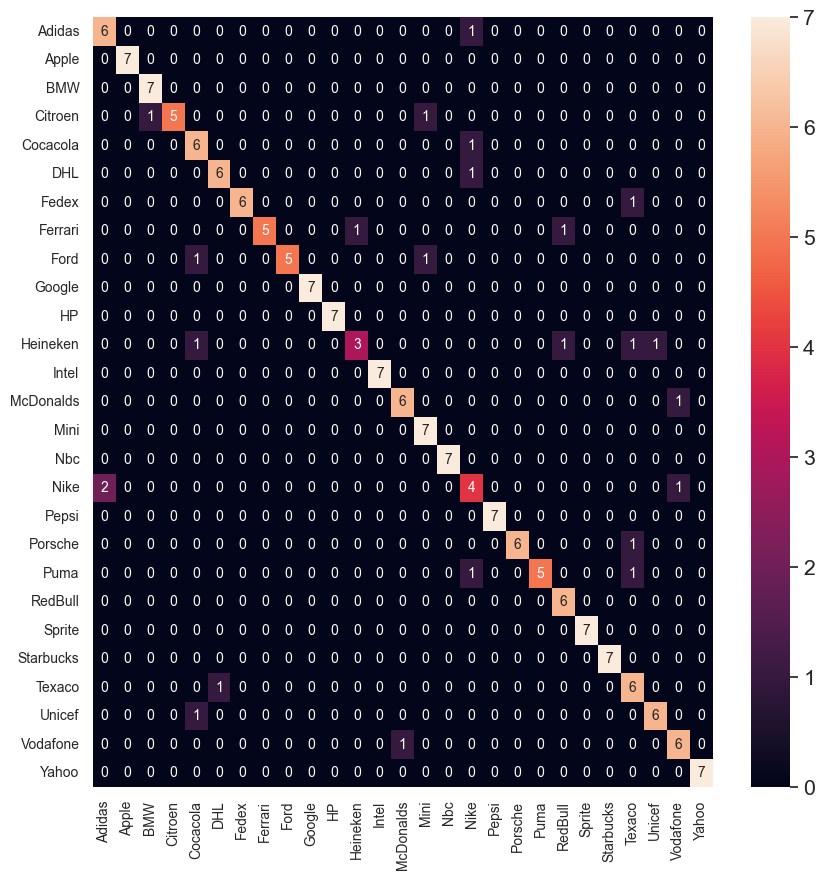

In [70]:
!pip install seaborn
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
print('Confusion Matrix on Valid Set')
cm = confusion_matrix(validset.classes, predIdxs)
df_cm = pd.DataFrame(cm, range(trainset.num_classes), range(trainset.num_classes))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
ax.set_xticklabels(y, rotation='vertical', fontsize=10)
ax.set_yticklabels(y, rotation='horizontal', fontsize=10)
plt.savefig('Confusion Matrix on Valid Set.png')
plt.show()

Confusion Matrix on Test Set


C:\Users\DharaniRaja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\DharaniRaja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


24/24 [==============================] - 22s 908ms/step


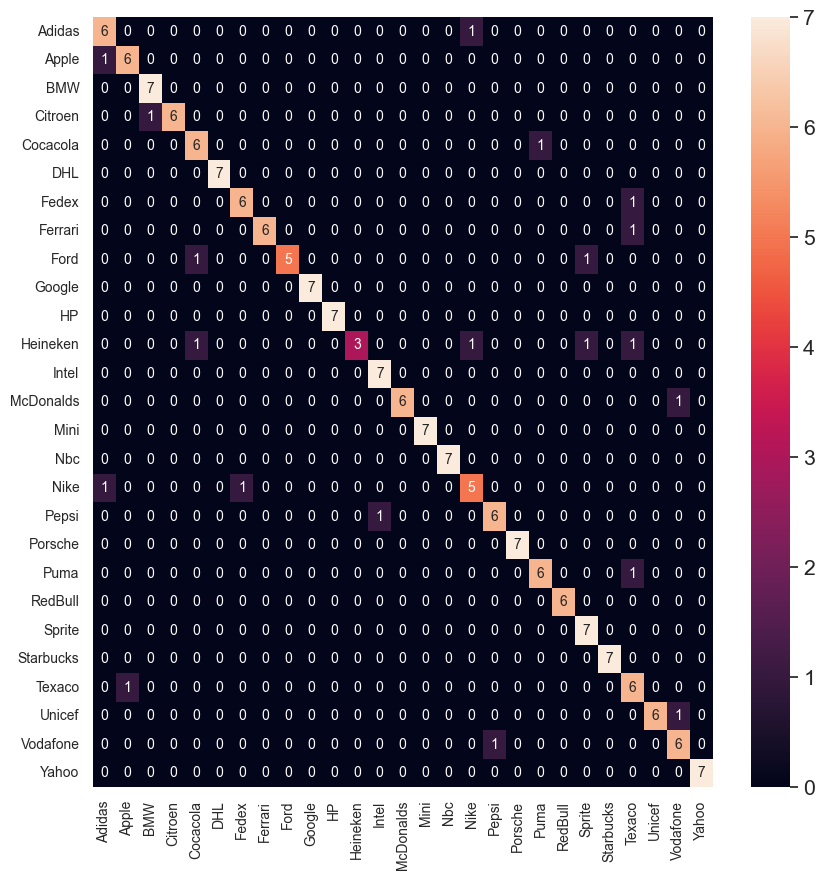

In [71]:
print('Confusion Matrix on Test Set')
validset.reset()
pred = ensemble_model.predict(x=validset)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(validset.classes, pred)
df_cm = pd.DataFrame(cm, range(trainset.num_classes), range(trainset.num_classes))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
ax.set_xticklabels(y, rotation='vertical', fontsize=10)
ax.set_yticklabels(y, rotation='horizontal', fontsize=10)
plt.savefig('Confusion Matrix on Test Set.png')
plt.show()